In [1]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From (original): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
From (redirected): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&confirm=t&uuid=23d43e69-20a1-49be-9c91-b477a6ee3908
To: /content/train_data.csv
100% 635M/635M [00:06<00:00, 92.9MB/s]


In [2]:
!gdown 1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h

Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100% 97.3M/97.3M [00:01<00:00, 50.8MB/s]


In [ ]:
!pip install gensim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

In [2]:
brands = pd.read_csv('title_brand.csv')
df = pd.read_csv('train_data.csv')

<ipython-input-2-5805cc8f5914>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_data.csv')


In [ ]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [5]:
brands.head()

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [3]:
df = df.merge(brands , on='asin' , how='inner')
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,title,brand
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,Barnes &amp; Noble Nook Color Tablet USB Cable...,Barnes &amp; Noble
...,...,...,...,...,...,...,...,...,...,...,...,...,...
855597,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800,"Android charger cable 10 ft, Extra long Nylon ...",DEEGO
855598,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000,"Android charger cable 10 ft, Extra long Nylon ...",DEEGO
855599,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000,Jricoo Nylon Braided 2.0 Micro USB Charging Ca...,Jricoo
855600,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400,Jricoo 3pack 6ft Micro USB to USB Cable 2.0 6f...,Jricoo


In [28]:
df.shape

(889072, 16)

In [58]:
df.vote.value_counts()

,count
vote,
2.0,38512
2,23461
3.0,18899
3,13312
4.0,10483
...,...
384.0,1
335.0,1
101.0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889072 entries, 0 to 889071
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         889072 non-null  int64 
 1   vote            889072 non-null  int64 
 2   verified        889072 non-null  bool  
 3   reviewTime      889072 non-null  object
 4   reviewerID      889072 non-null  object
 5   asin            889072 non-null  object
 6   style           525015 non-null  object
 7   reviewerName    888821 non-null  object
 8   reviewText      889072 non-null  object
 9   summary         888990 non-null  object
 10  unixReviewTime  889072 non-null  int64 
 11  title_x         889071 non-null  object
 12  brand_x         887906 non-null  object
 13  reviewlen       889072 non-null  int64 
 14  title_y         889071 non-null  object
 15  brand_y         887906 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 102.6+ MB


In [31]:
df[df['vote'].isna()].shape

(0, 16)

In [4]:
df['vote'] = df['vote'].fillna('0')
df['vote'].value_counts()

,count
vote,
0,660918
2.0,38512
2,23461
3.0,18899
3,13312
...,...
370,1
324,1
293,1


In [5]:
def correct_votes(x):

  x = str(x)
  num = ''
  for ch in x:
    if ch.isdigit() or ch =='.':
      num += ch
  return int(float(num))


In [6]:
df['vote'] = df['vote'].apply(lambda x : correct_votes(x))

In [35]:
df.vote.value_counts()

,count
vote,
0,687926
2,72121
3,37452
4,21747
5,14291
...,...
435,1
348,1
812,1


In [36]:
df.overall.value_counts()

,count
overall,
5,491221
4,164830
1,87330
3,85903
2,59788


In [37]:
df.groupby('asin').size().sort_values().tail(10)


,0
asin,
B0043T7FXE,856
B00S9SGNNS,905
B01DA0YCNC,996
B0002H02ZY,1060
B0002KVQBA,1080
B00P7EVST6,1115
B00L0YLRUW,1205
B0000BVYT3,1380
B0001FTVEK,1496


<Axes: xlabel='reviewlen', ylabel='Count'>

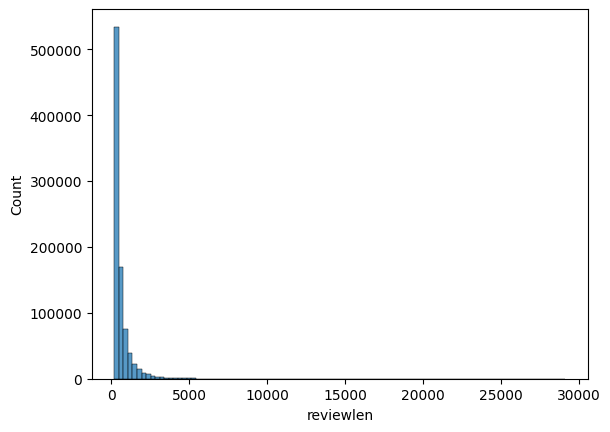

In [38]:
df['reviewlen'] = df['reviewText'].apply(lambda x : len(x))
sns.histplot(df['reviewlen'] , bins = 100)
# df[df['reviewlen'] <5000]['reviewlen']

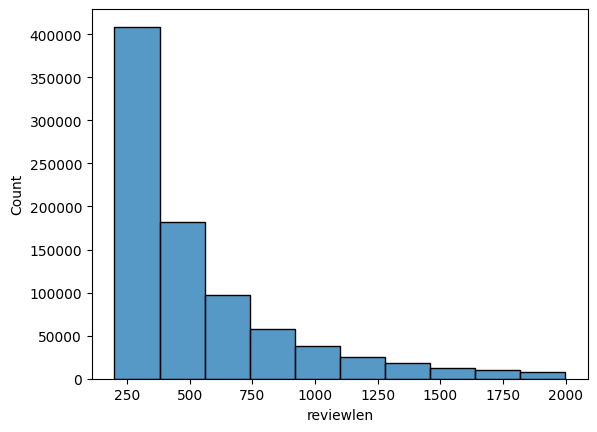

In [39]:
sns.histplot(df[df['reviewlen'] <2000]['reviewlen'], bins = 10);

In [40]:
df.groupby('reviewerID').ngroups

321120

In [41]:
df.groupby('reviewerName').ngroups

234093

In [45]:
# most_helpful_persons = df.groupby('reviewerID').agg({'vote': 'sum'})
df.groupby('reviewerID').agg({'vote': 'sum' , 'reviewerName':pd.Series.mode }).sort_values(by='vote').tail(10)

,vote,reviewerName
reviewerID,,
A2VQ0V1TWXF3U7,1820,Mark A. Baker
A33AN9NP6574M2,1867,DJ
AW7UMXXJKFSNS,1912,Sally B.
A1GHPJB2N0D0RL,2167,Chris Upton
ADLVFFE4VBT8,2607,Cthulhu
AMYCUX8EWEUVV,2631,Mayra S.
A1KPFZCS71QKW5,2978,nycebo
A2IK776FY6MEMG,3150,Obi Wan
A3KJ0DF3LTNJ6X,3181,Voltron00x


**5**

In [64]:
df[df.overall == 5].groupby('asin').agg({'unixReviewTime':'count','brand' : pd.Series.mode , 'title' : pd.Series.mode}).rename(columns={'unixReviewTime' : 'count' ,'brand':'Brand' ,'title' : 'Title'}).sort_values(by='count').tail(10)

,count,Brand,Title
asin,,,
B00P7EVST6,433,"Arlo Technologies, Inc",Arlo - Wireless Home Security Camera System | ...
B000WYVBR0,448,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...
B00S9SGNNS,471,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...
B0000BVYT3,482,NETGEAR,NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...
B00OBRE5UE,529,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...
B0043T7FXE,552,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...
B000VS4HDM,598,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...
B01DA0YCNC,600,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...
B00L0YLRUW,659,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700)


**6**

In [63]:
df.groupby('brand').agg({'unixReviewTime':'count' , 'overall' : 'mean'}).rename(columns={'unixReviewTime':'count'}).sort_values(by='count').tail(10)

,count,overall
brand,,
NETGEAR,7085,3.836274
Sabrent,7320,4.028005
SanDisk,8400,3.958810
TP-LINK,9773,3.928681
Anker,9860,4.244320
Asus,11928,3.855550
Sony,12436,3.938726
AmazonBasics,13213,4.201468
Samsung,15409,3.941268


section **B**

In [ ]:
nltk.download('punkt')
# model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens
df['processed_reviews'] = df['reviewText'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentences = df['processed_reviews'].tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model.save('word2vec.model')

In [ ]:
warranty_sim = model.wv.most_similar("warranty", topn=10)
warranty_sim

[('warrantee', 0.905733048915863),
 ('warrenty', 0.8870323300361633),
 ('warranties', 0.8268015384674072),
 ('warranty-', 0.7226121425628662),
 ('warantee', 0.6851722002029419),
 ('contract', 0.6786353588104248),
 ('policy', 0.6776549816131592),
 ('rebate', 0.6755817532539368),
 ('squaretrade', 0.6753352880477905),
 ('guarantee', 0.6600930094718933)]

In [ ]:
guarante_sim = model.wv.most_similar("guarantee", topn=10)
guarante_sim

[('warrantee', 0.6663374900817871),
 ('promise', 0.66145259141922),
 ('warranty', 0.6600930094718933),
 ('honor', 0.6545485258102417),
 ('guaranty', 0.6511234045028687),
 ('warrenty', 0.6349700689315796),
 ('guarentee', 0.6345338225364685),
 ('guarantees', 0.6256383061408997),
 ('warranties', 0.6215506196022034),
 ('warranty-', 0.602117121219635)]

In [ ]:
simwords = ['warrantee' , 'warrenty','warranties','warranty-','warantee','guaranty','guarentee','guarantees']

In [ ]:
def isThereGuarantee(txt):
  for simword in simwords:
    if simword in txt:
      return True
  return False
df['guaranteeRelevant'] = df['reviewText'].apply(lambda txt: isThereGuarantee(txt))

In [ ]:
aboutGuarantee = df[df['guaranteeRelevant']==True].copy()
# aboutGuarantee.shape
aboutGuarantee.groupby('asin').agg({'overall':'mean'})

,overall
asin,
B00001P4ZH,5.0
B00004Z7G9,3.0
B0000511AN,5.0
B00005129E,1.0
B0000512LA,5.0
...,...
B01H5JHEG6,3.0
B01H83D4VS,5.0
B01HDB7AYC,5.0


In [ ]:
!pip install transformers torch

Section **C**

In [7]:
model_df = df.sample(n=100000)

In [8]:
from sklearn.model_selection import train_test_split
texts = model_df.reviewText.tolist()
labels = model_df.overall.astype(int).tolist()
X_train , X_val , y_train , y_val = train_test_split(texts , labels , test_size=0.2 , random_state=42)

In [9]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X_train_encoded = tokenizer(X_train, truncation=True, padding=True, max_length=64,return_tensors="pt")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
X_val_encoded = tokenizer(X_val, truncation=True, padding=True, max_length=64,return_tensors="pt")

In [11]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)

for epoch in range(1):
    model.train()
    outputs = model(**X_train_encoded, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")